In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("healthcare/healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


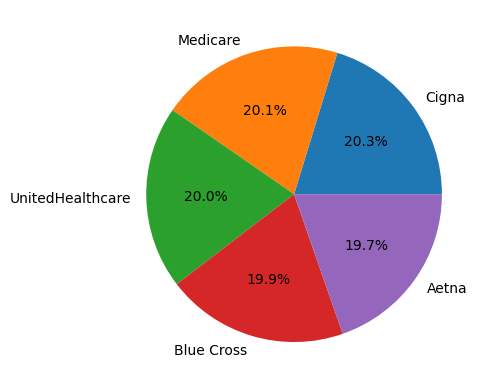

<Axes: ylabel='Insurance Provider'>

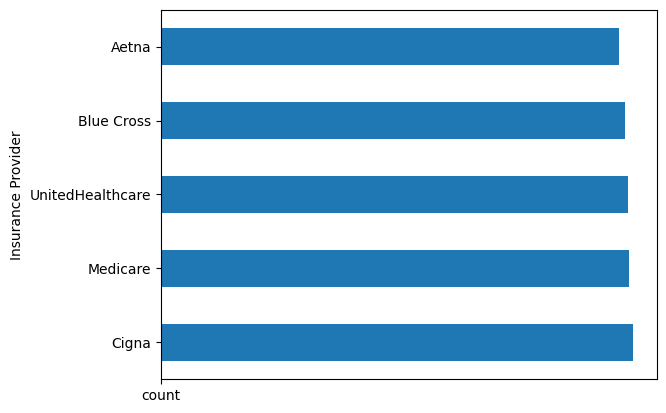

In [33]:
docs = df['Insurance Provider'].value_counts()
# docs = df['Doctor'].value_counts() > 10
# docs.plot(kind = 'pie')
plt.pie(docs, autopct='%1.1f%%', labels = docs.index)
plt.show()
docs.plot(kind = "barh")
# docs.plot(kind = "box")

In [4]:
age = pd.Series(df['Age'])
age

0        30
1        62
2        76
3        28
4        43
         ..
55495    42
55496    61
55497    38
55498    43
55499    53
Name: Age, Length: 55500, dtype: int64

In [5]:
disease = pd.Series(df['Medical Condition'])
disease

0              Cancer
1             Obesity
2             Obesity
3            Diabetes
4              Cancer
             ...     
55495          Asthma
55496         Obesity
55497    Hypertension
55498       Arthritis
55499       Arthritis
Name: Medical Condition, Length: 55500, dtype: object

In [6]:

medi = pd.concat([age, disease], axis=1)
medi

,Age,Medical Condition
0,30,Cancer
1,62,Obesity
2,76,Obesity
3,28,Diabetes
4,43,Cancer
...,...,...
55495,42,Asthma
55496,61,Obesity
55497,38,Hypertension
55498,43,Arthritis


In [7]:
mean_age = medi.groupby(by='Medical Condition').mean()
mean_age

,Age
Medical Condition,
Arthritis,51.565320
Asthma,51.575830
Cancer,51.558795
Diabetes,51.554170
Hypertension,51.741915
Obesity,51.240277


In [8]:
g_medi = medi.merge(df['Gender'], left_index=True, right_index=True)
g_medi

,Age,Medical Condition,Gender
0,30,Cancer,Male
1,62,Obesity,Male
2,76,Obesity,Female
3,28,Diabetes,Female
4,43,Cancer,Female
...,...,...,...
55495,42,Asthma,Female
55496,61,Obesity,Female
55497,38,Hypertension,Female
55498,43,Arthritis,Male


<Axes: ylabel='Age'>

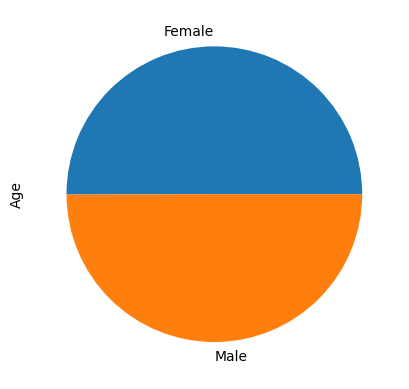

In [9]:
plot_medi = g_medi.groupby(by='Gender')['Age'].mean()
plot_medi.plot(kind = 'pie')

Medical Condition
Arthritis       51.565320
Asthma          51.575830
Cancer          51.558795
Diabetes        51.554170
Hypertension    51.741915
Obesity         51.240277
Name: Age, dtype: float64


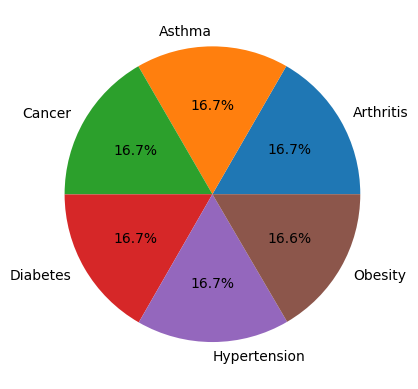

In [10]:
ll_medi = g_medi.groupby(by ='Medical Condition')['Age'].mean()
print(ll_medi)
plt.pie(ll_medi, labels = ll_medi.index, autopct = '%1.1f%%')
plt.show()

In [35]:
import seaborn as sns

correlation = df.corr()

sns.heatmaps(correlation, cmap = 'coolwarm', annot = True, fmt = '.2f')

KeyboardInterrupt: 